Descriptive statistics.
Start with just computing them, but think about how to put them in context.


In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("test_df_2.csv")
# index value is in this temp csv
df.drop(df.columns[0], axis=1, inplace=True)

In [4]:
df_uniq = df.drop_duplicates("stop_id")

In [5]:
total_recs = len(df_uniq)

In [6]:
df_uniq.keys()

Index(['stop_id', 'date_time', 'duration', 'call_for_service', 'location',
       'actions_taken', 'Person Search Consent Given',
       'Property Search Consent Given', 'basis_for_search', 'reason_for_stop',
       'result', 'limited_english', 'age', 'gender', 'Gender Nonconforming',
       'lgbt', 'race', 'disabilities', 'evidence_found'],
      dtype='object')

In [7]:
def basic_pie(pd_series):
    counts = pd_series.value_counts()
    
    fig1, ax1 = plt.subplots()
    ax1.pie(counts.values, labels=counts.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.show()

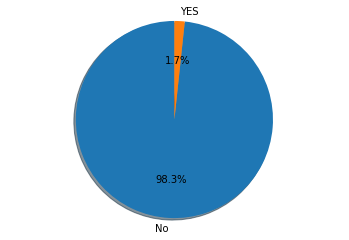

In [8]:
basic_pie(df_uniq["call_for_service"])

In [9]:
age_bins = [10*x for x in range(10)]
age_hist=np.histogram(df_uniq["age"], bins=(age_bins))

In [10]:
age_hist

(array([  0,  79, 264, 316, 322, 254, 136,  43,  11]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90]))

In [11]:
hist_cum = age_hist[0].cumsum()

In [12]:
widths = age_hist[0]
starts = hist_cum - widths

In [13]:
widths

array([  0,  79, 264, 316, 322, 254, 136,  43,  11])

In [14]:
category_colors = plt.colormaps['RdYlGn'](np.linspace(0.15, 0.85, len(widths)))


In [15]:
category_names = [str(x) for x in age_bins]

In [16]:
category_names

['0', '10', '20', '30', '40', '50', '60', '70', '80', '90']

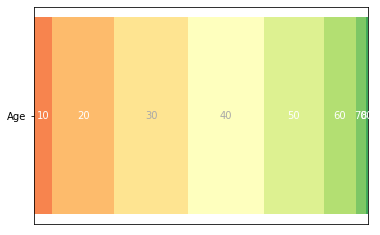

In [17]:
fig, ax = plt.subplots()
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim(0, np.sum(age_hist[0]).max())

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    if age_hist[0][i] > 0:
        widths = age_hist[0][i]
        starts = hist_cum[i] - widths
#        print("{}: widths={} starts={} colname={}".format(i, widths, starts, colname))
        rects = ax.barh("Age", widths, left=starts, height=0.1,
                            label=colname, color=color)
    #    print("   rects: {}".format(rects))
        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, labels=[colname], label_type='center', color=text_color)
    
#ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1), loc='lower left', fontsize='small')
plt.show()

In [18]:
age_bins[-1]

90

In [19]:
def single_bar(pd_series, name, fig, num_bars, bar_num):
    if name == "age":
        age_bins = [10*x for x in range(10)]
        age_hist=np.histogram(pd_series.values, bins=(age_bins))
        data = age_hist[0]
        category_names = ["{}-{}".format(age_bins[i], age_bins[i+1]) for i in range(len(age_bins)-1)]
    else:
        counts = pd_series.value_counts()
        category_names = counts.keys()
        data = counts.values
    
    labels = [name]
    data_cum = data.cumsum()
    category_colors = plt.colormaps['RdYlGn'](
    np.linspace(0.15, 0.85, len(data)))

    ax = plt.subplot(num_bars, 1, bar_num)
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.max(sum(data), 0))

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[i]
        starts = data_cum[i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.8,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        ax.bar_label(rects, labels=[colname], label_type='center', color=text_color, rotation=0)


In [20]:
df.keys()

Index(['stop_id', 'date_time', 'duration', 'call_for_service', 'location',
       'actions_taken', 'Person Search Consent Given',
       'Property Search Consent Given', 'basis_for_search', 'reason_for_stop',
       'result', 'limited_english', 'age', 'gender', 'Gender Nonconforming',
       'lgbt', 'race', 'disabilities', 'evidence_found'],
      dtype='object')

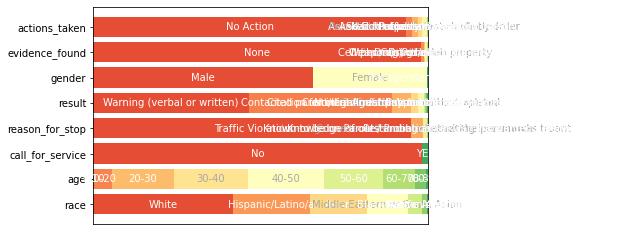

In [21]:
keys = ["race", "age", "call_for_service", "reason_for_stop", "result", "gender", "evidence_found", "actions_taken"]
#keys = ["age"]
fig = plt.subplots(len(keys), 1)
for key in keys:
    single_bar(df_uniq[key], key, fig, 1, 1)
plt.show()

In [22]:
df_uniq["race"].value_counts()

White                            593
Hispanic/Latino/a                330
Asian                            241
Middle Eastern or South Asian    177
Black/African American            56
Pacific Islander                  23
Native American                    5
Name: race, dtype: int64

In [23]:
from plotting.lare_matplot import plot_descriptive_bars

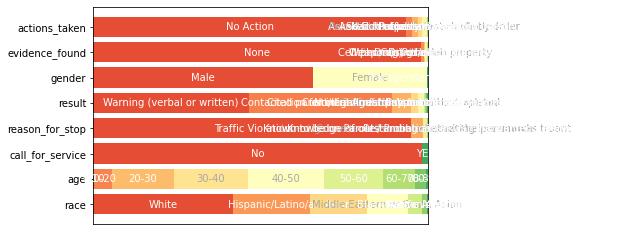

In [24]:
plot_descriptive_bars(df_uniq)